# Reaction flux fit

In [1]:
import pandas as pd
import cobra
import alloregfit as arf
import matplotlib.pyplot as plt
import numpy as np

Load data and model:

In [8]:
cond = ['glc-NCM3722_1','glc-NQ1243_3','glc-NQ1243_4','glc-NQ1243_5','glu-NCM3722_9','glu-NQ393_11','glu-NQ393_12','glu-NQ393_13','glu-NQ393_14']
data_dir = "C:/Users/user/polybox/MASTER/THESIS/3_Karl_data/"
model = cobra.io.load_matlab_model(data_dir+"iJO1366.mat")
fluxes = pd.read_excel(data_dir+"fluxes_C13.xlsx",index_col="name")[cond]
fluxes_sd = pd.read_excel(data_dir+"fluxes_C13.xlsx",sheetname=1,index_col="name")[cond]
metabolites = pd.read_excel(data_dir+"metabolites.xlsx",index_col="name")[cond]
proteins = pd.read_excel(data_dir+"proteome.xlsx",index_col="name")[cond]
mapping = pd.read_table(data_dir+"ECOLI_83333_idmapping.dat",header=None)
rxn_id = open(data_dir+'reactions.txt').read().splitlines()
reg_coli = pd.read_csv(data_dir+"SMRN.csv",index_col="rxn_id")

Run alloregfit to obtain the predicted flux estimation:

In [5]:
binding_site = [[['dhap_c', 'fdp_c', 'g3p_c']], [['fum_c', 'mal__L_c']], [['6pgl_c', 'g6p_c'], ['nadp_c', 'nadph_c']], [['6pgc_c', 'ru5p__D_c'], ['nadp_c', 'nadph_c'], ['co2_c']], [['mal__L_c', 'oaa_c'], ['nad_c', 'nadh_c']], [['nad_c', 'nadh_c'], ['nadp_c', 'nadph_c']], [['adp_c', 'atp_c'], ['f6p_c', 'fdp_c']], [['f6p_c', 'g6p_c']], [['adp_c', 'atp_c'], ['pep_c', 'pyr_c']], [['g3p_c', 'xu5p__D_c'], ['r5p_c', 's7p_c']], [['dhap_c', 'g3p_c']]]
summary,bools = arf.define_reactions(rxn_id,model,binding_site,fluxes,proteins,metabolites)
candidates = arf.define_candidates(rxn_id,reg_coli,metabolites,bools)
markov_par = {'freq':20,'nrecord':200,'burn_in':0}
results = arf.fit_reactions(summary,model,markov_par)
results

Running MCMC-NNLS for reaction 0... Candidate regulator: 
Number of parameters outpaces the number of conditions.
Running MCMC-NNLS for reaction 1... Candidate regulator: 
Running MCMC-NNLS for reaction 2... Candidate regulator: 
Running MCMC-NNLS for reaction 3... Candidate regulator: 
Running MCMC-NNLS for reaction 4... Candidate regulator: 
Number of parameters outpaces the number of conditions.
Running MCMC-NNLS for reaction 5... Candidate regulator: 
Number of parameters outpaces the number of conditions.
Running MCMC-NNLS for reaction 6... Candidate regulator: 
Number of parameters outpaces the number of conditions.
Running MCMC-NNLS for reaction 7... Candidate regulator: 
Running MCMC-NNLS for reaction 8... Candidate regulator: 
Running MCMC-NNLS for reaction 9... Candidate regulator: 
Number of parameters outpaces the number of conditions.
Running MCMC-NNLS for reaction 10... Candidate regulator: 


,reaction,rxn_id,regulator,equation,meas_flux,pred_flux,best_fit,best_lik
idx,,,,,,,,
10.0,dhap_c <=> g3p_c,TPI,,"{'vmax': K_cat_tpiA*c_tpiA, 'occu': c_dhap_c**...",glc-NCM3722_1 glc-NQ1243_3 glc-NQ1243_4...,"[[8.78554055223, 10.0818115025, 5.84892924395,...",K_dhap_c kcat 126 21020....,-18.677865
7.0,g6p_c <=> f6p_c,PGI,,"{'vmax': K_cat_pgi*c_pgi, 'occu': (c_g6p_c**1....",glc-NCM3722_1 glc-NQ1243_3 glc-NQ1243_4...,"[[7.81140598917, 8.5795259817, 7.71484163255, ...",K_g6p_c K_eq K_f6p_c ...,-18.201729
8.0,adp_c + h_c + pep_c --> atp_c + pyr_c,PYK,,{'vmax': K_cat_pykA*c_pykA + K_cat_pykF*c_pykF...,glc-NCM3722_1 glc-NQ1243_3 glc-NQ1243_4...,"[[16.753512248, 15.1548020291, 10.3808037435, ...",K_adp_c K_pep_c K_eq ...,-15.616252
2.0,g6p_c + nadp_c <=> 6pgl_c + h_c + nadph_c,G6PDH2r,,"{'vmax': K_cat_zwf*c_zwf, 'occu': (c_g6p_c**1....",glc-NCM3722_1 glc-NQ1243_3 glc-NQ12...,"[[2.20292625448, 2.14952560107, 2.25583451201,...",K_g6p_c K_nadp_c K_eq K_nadph_...,-9.822540
1.0,fum_c + h2o_c <=> mal__L_c,FUM,,{'vmax': K_cat_fumA*c_fumA + K_cat_fumC*c_fumC...,glc-NCM3722_1 glc-NQ1243_3 glc-NQ1243_4...,"[[2.06763613905, 3.46780826204, 5.06542416958,...",K_fum_c K_eq K_mal__L_c ...,-9.368505
3.0,6pgc_c + nadp_c --> co2_c + nadph_c + ru5p__D_c,GND,,"{'vmax': K_cat_gnd*c_gnd, 'occu': (c_6pgc_c**1...",glc-NCM3722_1 glc-NQ1243_3 glc-NQ1243_4...,"[[2.26264448496, 2.05843659455, 1.93998912213,...",K_6pgc_c K_nadp_c K_eq K_r...,-0.894997


In [9]:
def plot_fit(idx,results,fluxes_sd):
    react = results.loc[idx];
    meas_flux = summary['flux'][idx].values
    meas_flux_sd = fluxes_sd.loc[summary['rxn_id'][idx],summary['flux'][idx].columns]
    pred_flux = react['pred_flux']
    ind = np.arange(meas_flux.shape[1])
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, meas_flux.reshape(ind.shape), width, color='r', yerr=meas_flux_sd)
    rects2 = ax.bar(ind + width, pred_flux[0].reshape(ind.shape), width, color='y')
    ax.set_ylabel('Flux (mmol*gCDW-1*h-1)')
    ax.set_title('%s: Flux fit between predicted and measured data' % results['rxn_id'][idx])
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(list(summary['flux'][idx].columns),rotation = 30, ha="right")
    ax.legend((rects1, rects2), ('Measured', 'Predicted'))
    plt.show()

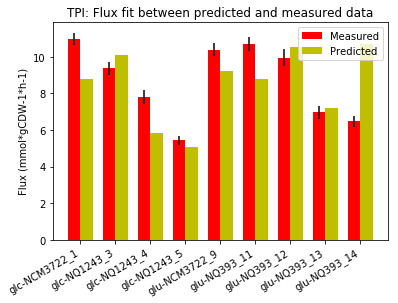

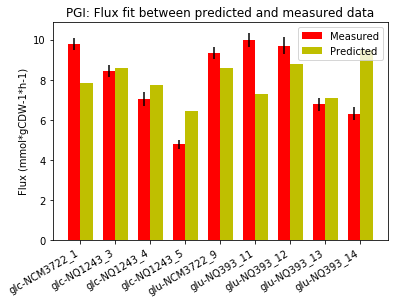

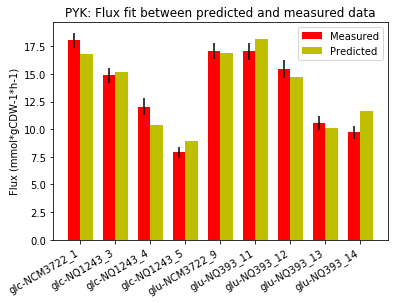

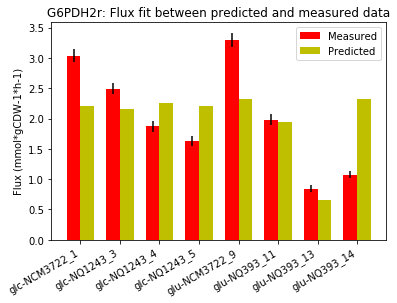

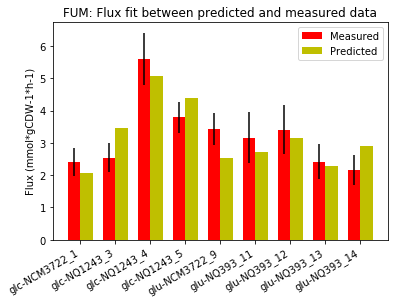

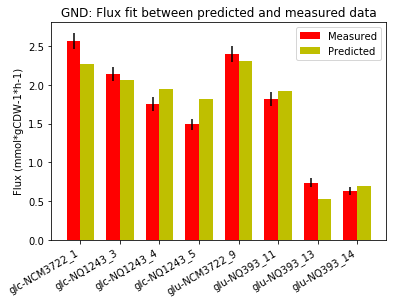

In [11]:
for i in list(results.index):
    plot_fit(i,results,fluxes_sd)